In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

analyses = pd.read_csv('../raw_data/naiades_export/Analyses.CSV', sep=';', header=0)


/tmp/ipykernel_40816/1976879792.py:1: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  analyses = pd.read_csv('data/naiades_export/Analyses.CSV', sep=';', header=0)


In [3]:
params = analyses.groupby(["CdParametre",'CdUniteMesure','CdFractionAnalysee'])


In [4]:

param_series = analyses['LbLongParamètre']+' - '+analyses['SymUniteMesure']+ ' - ' + analyses['LbFractionAnalysee']
analyses_light = analyses[['CdStationMesureEauxSurface','CdPrelevement','RsAna']].copy()
analyses_light['param'] = param_series

## Corrélation entre paramètres

Pour calculer la corrélation entre paramètres, il est nécessaire de changer de focus pour avoir non plus des résultats d'analyse comme individu mais des prélèvements.

In [5]:
an2 = analyses_light.pivot_table(values='RsAna',index=['CdStationMesureEauxSurface','CdPrelevement'],columns='param')

In [6]:
cols=[]
for col in an2.columns :
  if (an2[col].count()>=481):
    cols.append(col)
an3=an2[cols]

In [7]:
remplissage_an3 = (~an3.isnull()).sum(axis=1)

In [8]:
an4 = an3[remplissage_an3>1]

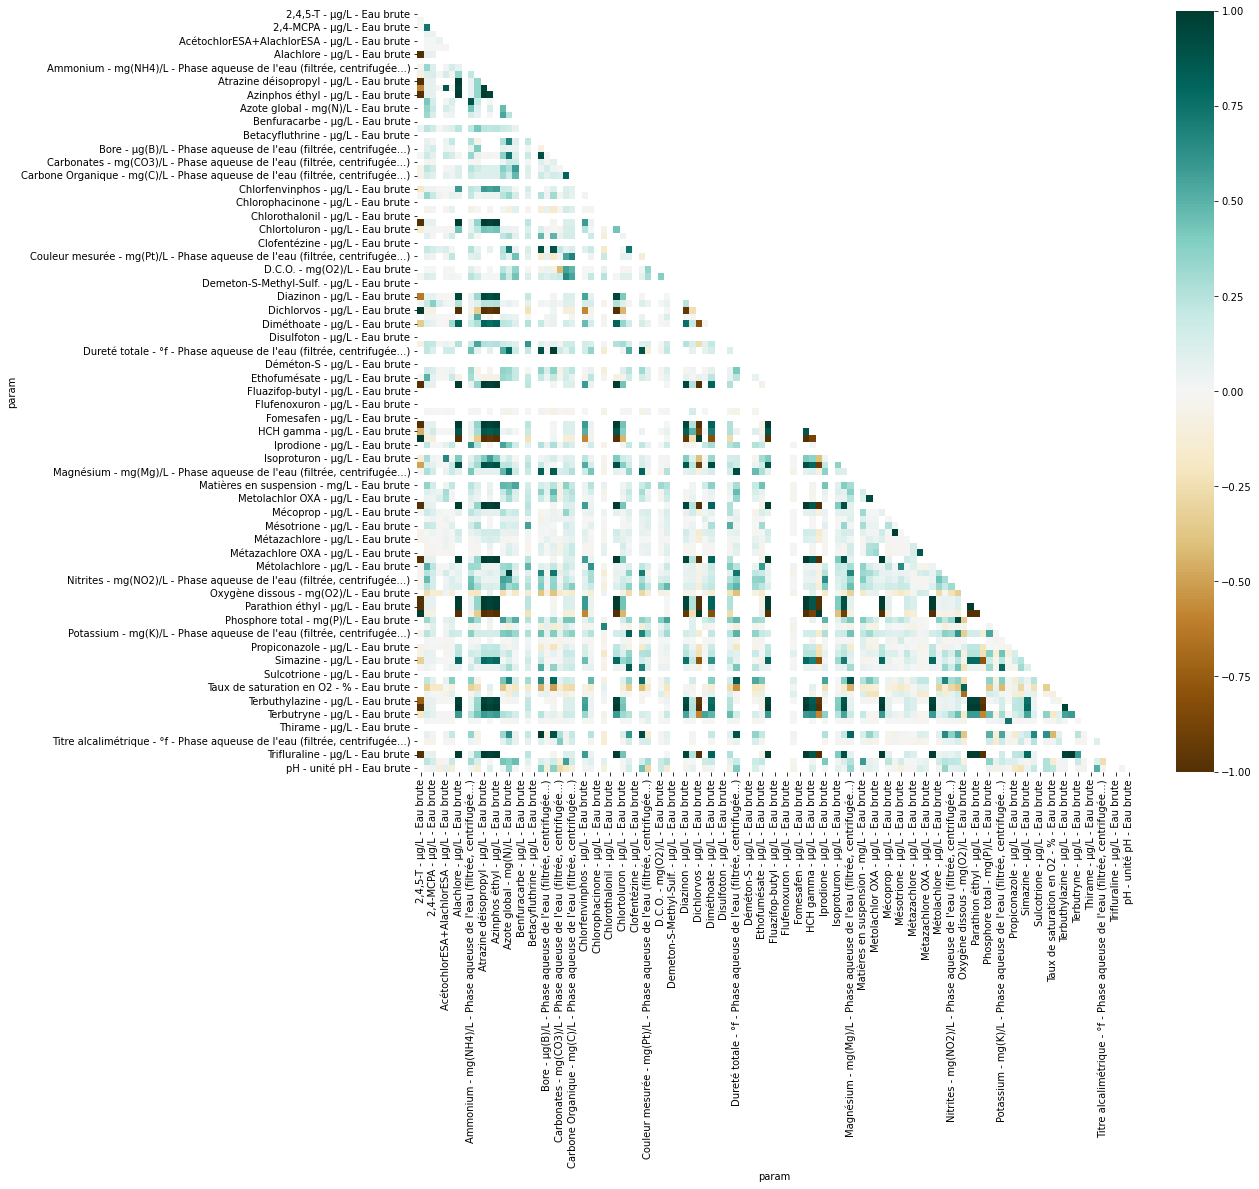

In [10]:
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(an4.corr(), dtype=bool))  # Use 'bool' instead of 'np.bool'
sns.heatmap(an4.corr(), annot=False, cmap='BrBG', mask=mask)
plt.show()  # Don't forget to show the plot
